In [1]:
from tensorflow.keras.datasets import mnist
from m_nn import NN
from m_nn import acc_cal
import numpy as np
from matplotlib import pyplot as plt

本文件“find_para.ipynb”用于寻找最适合的参数并将寻找过程与最佳参数的神经网络的权重参数可视化
其中神经网络的构建请详见“m_nn.py”文件。
<font color="#dd0000">运行本文件需要把“m_nn.py”文件放在同一目录下</font><br />

首先加载数据，划分训练与验证集，对X_train与X_val进行reshape(这是为了让28×28矩阵转为784的向量，便于乘以权重矩阵进行处理)

In [2]:
(X, y), (X_test, y_test) = mnist.load_data()
train_num = 58000
val_num = 2000
test_num = 1000
validation_range = range(train_num,60000)
X_train = X[range(train_num)]
y_train = y[range(train_num)]
X_val = X[validation_range]
y_val = y[validation_range]
X_train = X_train.reshape(train_num,-1)
X_val = X_val.reshape(val_num,-1)
X_test = X_test.reshape(test_num,-1)

设置相应的输入大小与分类数目（根据数据集进行设置）

In [3]:
input_size = 28*28
classes = 10

接下来我们分别设置了关于隐藏层大小，学习率以及正则化强度的列表，用于进行交叉验证。我们将整个交叉验证过程都输出
凭借验证过程的准确率选出最优的参数组合

In [4]:
hidden_range = [50,100,150]
lr_range = [1e-5,1e-4,1e-3,1e-2]
lambda_range = [0.25,0.5,0.75,1,]
range_of_acc = []
for hidden in hidden_range:
    for lr in lr_range:
        for lambda_ in lambda_range:
            nn = NN(input_size, hidden, classes)

            loss_his,train_acc,val_acc = nn.train(X_train,y_train,X_val,y_val,batch_size = 100,epochs = 20,
                                      lr = lr,lr_decrease = 0.5,lambda_ = lambda_, if_print = False)
            validation_accuracy = acc_cal(nn.predict(X_val),y_val)
            range_of_acc.append([hidden,lr,lambda_,validation_accuracy])
            
range_of_acc = sorted(range_of_acc,key = lambda x:x[-1])
best = range_of_acc[-1]
for element in range_of_acc:
    print("hidden layer's size:%d,learning rate:%f,regularization:%f,validation accuracy:%f"
          %(element[0],element[1],element[2],element[3]))

hidden layer's size:150,learning rate:0.010000,regularization:0.500000,validation accuracy:0.106500
hidden layer's size:150,learning rate:0.010000,regularization:0.750000,validation accuracy:0.106500
hidden layer's size:50,learning rate:0.010000,regularization:0.500000,validation accuracy:0.107000
hidden layer's size:50,learning rate:0.010000,regularization:0.750000,validation accuracy:0.107000
hidden layer's size:50,learning rate:0.010000,regularization:1.000000,validation accuracy:0.107000
hidden layer's size:100,learning rate:0.010000,regularization:0.500000,validation accuracy:0.107000
hidden layer's size:100,learning rate:0.010000,regularization:0.750000,validation accuracy:0.107000
hidden layer's size:100,learning rate:0.010000,regularization:1.000000,validation accuracy:0.107000
hidden layer's size:150,learning rate:0.010000,regularization:0.250000,validation accuracy:0.107000
hidden layer's size:50,learning rate:0.000010,regularization:0.500000,validation accuracy:0.118500
hidd


经过上述的过程我们并不满意与整个过程冗长的输出，我们决定一定程度上基于最优参数对交叉验证过程进行可视化。
对于学习率，正则化强度与隐藏层大小三个参数，我们分别控制两者为上一步中选出的最优参数组合的数值，可视化剩余一个参数变化对于验证过程准确度的影响

图像经过散点图进行呈现。由于时间等因素我们是测试了较少量的参数（但是参数范围的选取均基于了前人经验），所以只能一定程度反映各个参数与验证过程精确度的关系。

首先探讨学习率与验证过程准确度的关系。因为学习率取值具有不同的数量级，为了横坐标分布均匀，<font color="#dd0000">我们选取了log(learning rate)作为横坐标：</font><br /> 

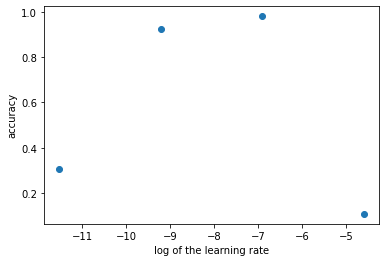

In [5]:
lr_range = []
acc_range = []
for element in range_of_acc:
    if element[0] == best[0] and element[2] == best[2]:
        lr_range.append(element[1])
        acc_range.append(element[-1])

plt.xlabel('log of the learning rate')
plt.ylabel('accuracy')
plt.scatter(np.log(lr_range),acc_range,marker = "o")
plt.show()


接下来为隐藏层与验证过程准确度

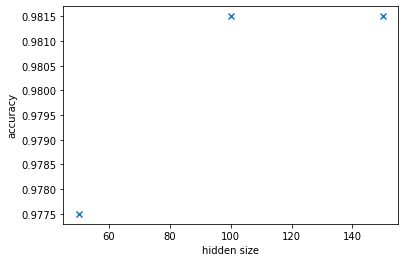

In [6]:
hidden_range = []
acc_range = []
for element in range_of_acc:
    if element[1] == best[1] and element[2] == best[2]:
        hidden_range.append(element[0])
        acc_range.append(element[-1])
plt.scatter(hidden_range,acc_range,marker="x")
plt.ylabel("accuracy")
plt.xlabel("hidden size")
plt.show()

接下来是正则化强度与验证过程精确度

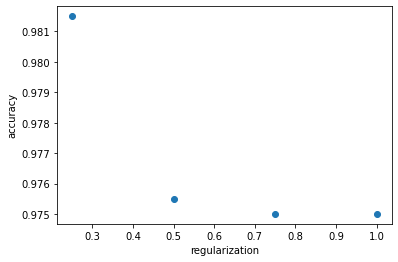

In [7]:
reg_range = []
acc_range = []
for element in range_of_acc:
    if element[0] == best[0] and element[1] == best[1]:
        reg_range.append(element[2])
        acc_range.append(element[-1])
plt.scatter(reg_range,acc_range,ls="-",marker="o")
plt.ylabel("accuracy")
plt.xlabel("regularization")
plt.show()

接下来运行效果最好的一组参数并保存模型

In [8]:
from m_nn import save
nn = NN(input_size, best[0], classes)
loss_his,train_acc,val_acc = nn.train(X_train,y_train,X_val,y_val,batch_size = 100,epochs = 20,
                                      lr = element[1],lr_decrease = 0.5,lambda_ = element[2])
validation_accuracy = acc_cal(nn.predict(X_val),y_val)
print ('Validation Accuracy: ', validation_accuracy)
w1,w2 = nn.para['w1'],nn.para['w2']
nn.lr = element[1]
nn.reg = element[2]
nn.hid = element[0]
save_path = "nn.pkl"
save(nn, save_path)

epoches: 1, sum_epoches :58000, train acc: 0.970000, validation acc = 0.948000, loss = 7.989042
epoches: 2, sum_epoches :58000, train acc: 0.990000, validation acc = 0.964000, loss = 8.875204
epoches: 3, sum_epoches :58000, train acc: 0.990000, validation acc = 0.967000, loss = 7.684172
epoches: 4, sum_epoches :58000, train acc: 0.970000, validation acc = 0.975000, loss = 8.603950
epoches: 5, sum_epoches :58000, train acc: 0.990000, validation acc = 0.976500, loss = 9.194030
epoches: 6, sum_epoches :58000, train acc: 0.970000, validation acc = 0.976500, loss = 9.073277
epoches: 7, sum_epoches :58000, train acc: 0.990000, validation acc = 0.978000, loss = 7.645748
epoches: 8, sum_epoches :58000, train acc: 0.960000, validation acc = 0.980000, loss = 8.694188
epoches: 9, sum_epoches :58000, train acc: 0.970000, validation acc = 0.976500, loss = 8.418337
epoches: 10, sum_epoches :58000, train acc: 0.970000, validation acc = 0.979500, loss = 8.402654
epoches: 11, sum_epoches :58000, train 

这一部分我们将该最好模型的参数保存以后，将整个训练过程可视化出来，上过程也展示了验证过程的精确度

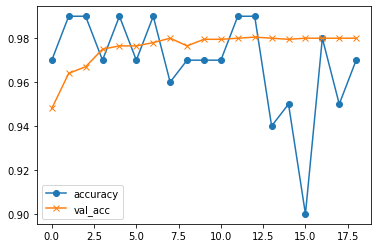

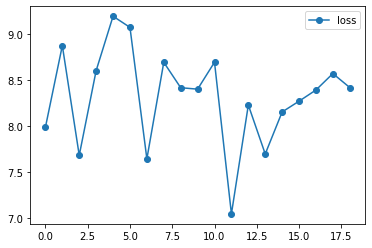

In [9]:
plt.plot(train_acc,label="accuracy",ls="-",marker="o")
plt.plot(val_acc,label="val_acc",ls="-",marker="x")
plt.ylabel=("accuracy")
plt.xlabel=("epoch")
plt.legend(loc="best")
plt.show()
plt.plot(loss_his,label="loss",ls="-",marker="o")
plt.ylabel=("loss")
plt.xlabel=("epoch")
plt.legend(loc="best")
plt.show()

最后我们对权重矩阵进行可视化，方法是对权重矩阵的前十层，reshape为（28,28）的形状进行展示

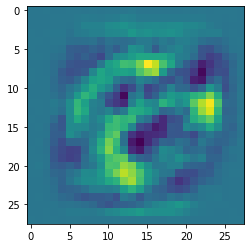

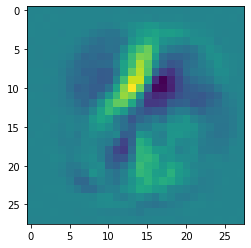

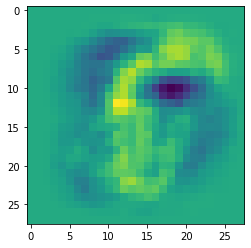

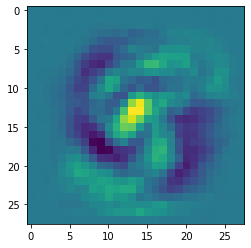

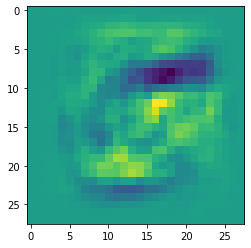

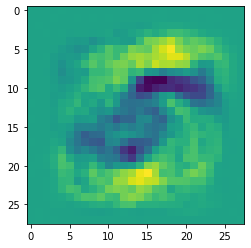

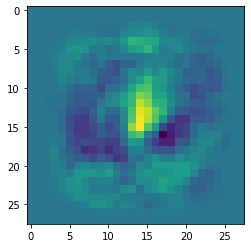

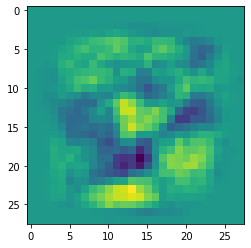

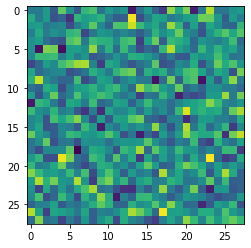

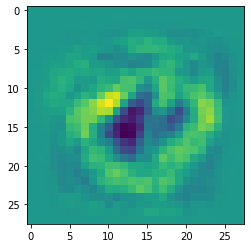

In [10]:
for i in range(10):  
    im=w1[:,i].reshape(28,28) 
    plt.imshow(im) 
    plt.show()


再对w2进行可视化，由于w2的形状为hidden×output，我们不能使用上述方法进行可视化，所以我们简单地将其展示

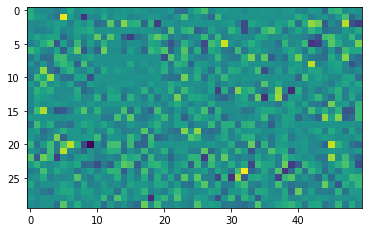

In [13]:
plt.imshow(w2.reshape(30,-1))
plt.show()